In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = "insurance.csv"
data = pd.read_csv(file_path)


X = data[['age', 'bmi', 'children']]
Y = data['charges']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


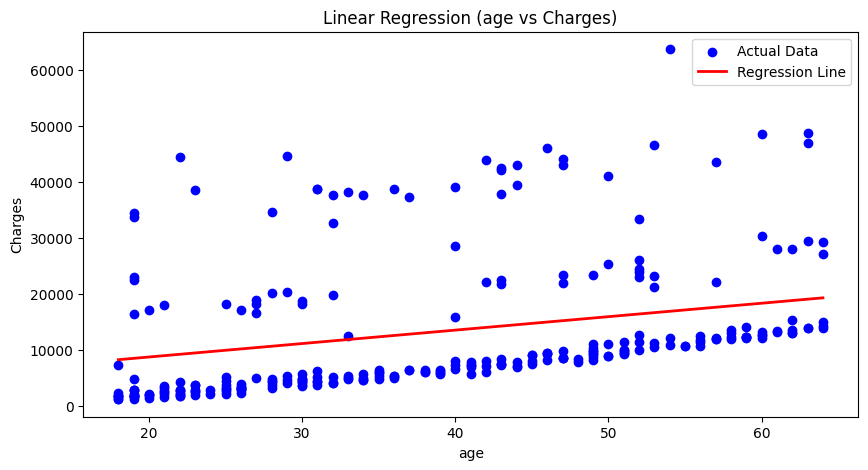

Linear Regression Coefficients: [240.59655979]
Linear Regression Intercept: 3876.928684191691
Mean Squared Error (Linear Regression): 135983957.4805469
R2 Score (Linear Regression): 0.12408973539501944


In [3]:
# MULTIPLE LINEAR REGRESSION
feature = "age"
X_feature_train = X_train[[feature]]
X_feature_test = X_test[[feature]]

linear_model = LinearRegression()
linear_model.fit(X_feature_train, Y_train)


x_range = np.linspace(X_feature_test.min(), X_feature_test.max(), 100).reshape(-1, 1)
y_range_pred = linear_model.predict(x_range)


plt.figure(figsize=(10, 5))
plt.scatter(X_feature_test, Y_test, color="blue", label="Actual Data")
plt.plot(x_range, y_range_pred, color="red", label="Regression Line", linewidth=2)
plt.title(f"Linear Regression ({feature} vs Charges)")
plt.xlabel(feature)
plt.ylabel("Charges")
plt.legend()
plt.show()

print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression Intercept:", linear_model.intercept_)
print("Mean Squared Error (Linear Regression):", mean_squared_error(Y_test, linear_model.predict(X_feature_test)))
print("R2 Score (Linear Regression):", r2_score(Y_test, linear_model.predict(X_feature_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
<ipython-input-19-213d1fd46750>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


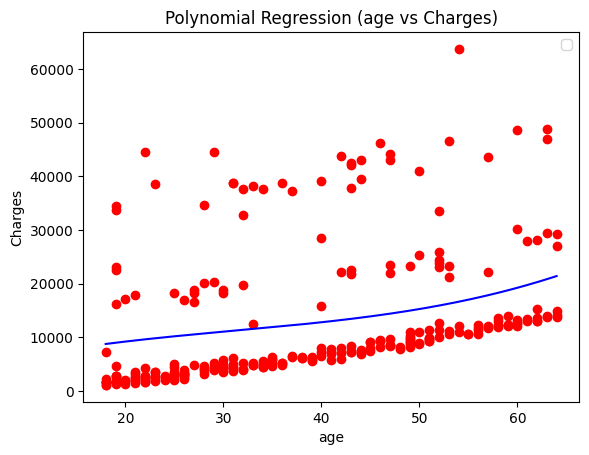

Mean Squared Error (Polynomial Regression): 136845312.52265912
R2 Score (Polynomial Regression): 0.118541509436356


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [19]:
# POLYNOMIAL REGRESSION
# Add polynomial features (degree=2 for quadratic relationship)
poly_features = PolynomialFeatures(degree=3)
X_feature_poly_train = poly_features.fit_transform(X_feature_train)

poly_model = LinearRegression()
poly_model.fit(X_feature_poly_train, Y_train)

x_range_poly = poly_features.transform(x_range)
y_range_poly_pred = poly_model.predict(x_range_poly)

X_grid = np.arange(min(X_test['age']), max(X_test['age']), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test['age'], Y_test, color='red')  # Also change here to plot against 'age'
plt.plot(X_grid, poly_model.predict(poly_features.fit_transform(X_grid)), color='blue')
plt.title(f"Polynomial Regression ({feature} vs Charges)")
plt.xlabel(feature)
plt.ylabel("Charges")
plt.legend()
plt.show()

print("Mean Squared Error (Polynomial Regression):", mean_squared_error(Y_test, poly_model.predict(poly_features.transform(X_feature_test))))
print("R2 Score (Polynomial Regression):", r2_score(Y_test, poly_model.predict(poly_features.transform(X_feature_test))))
